IA & Data science (LU3IN0226) -- 2022-2023
--------
*&copy; Equipe pédagogique: Christophe Marsala, Olivier Schwander, Jean-Noël Vittaut.*

<font size="+1" color="RED"><b>[Q]</b></font> <font size="+1"><b>Indiquer dans la boîte ci-dessous vos noms et prénoms :</b></font>

Neil BENAHMED

Paul JARSKI

Ce projet peut être fait en binôme (et c'est fortement conseillé) ou tout seul.

Le nom de chaque membre du binôme doit être indiqué, et un seul rendu sur un des deux comptes Moodle doit être fait.

Les groupes de plus de 2 personnes ne sont pas autorisés.

<font color="RED" size="+1"><b>[Q]</b></font> **Renommer ce fichier ipython**

Tout en haut de cette page, cliquer sur <tt>projet-2</tt> et rajouter à la suite de <tt>projet-2</tt> les noms des membres du binômes séparés par un tiret.

<font color="RED" size="+1">IMPORTANT: soumission de votre fichier final</font>

**Nom à donner au notebook** : *projet-2-Nom1_Nom2.ipynb* 
- *Nom1* et *Nom2* : noms des membres du binôme

**Le compte-rendu doit être rendu sur la page Moodle.**

# Projet 2 - avril-mai 2023


<font size="+1" color="RED"><b>Date de rendu : lundi 22 mai 2023, avant 18h</b></font>
    
<b>Attention! le site Moodle ferme à 18h pile !</b> prévoyez de vous y connecter au moins 15mn avant la fermeture...

Vous devez compléter ce notebook en rajoutant vos expérimentations avec vos algorithmes d'apprentissage sur les données fournies dans le répertoire `data`.

## Travail à faire

Appliquer les algorithmes d'apprentissage vus tout au long du semestre sur les données afin de mettre en évidence des résultats intéressants.
Deux problèmes, au moins, doivent être traités:
- un problème d'apprentissage supervisé
- un problème d'apprentissage non supervisé


## Travail à rendre
Ce qui doit être remis avant la date limite : un fichier archive (`.tar`, `.tgz`, ou `.zip` uniquement) contenant:
- ce notebook complété. Il doit pouvoir être exécuté sans autre apport (pensez à vous en assurer avant de le rendre). 
- votre librairie iads sous la forme d'une archive avec votre répertoire `iads/` contenant tous les fichiers nécessaires 
- un fichier PDF dont le nom est de la forme: *projet-1-Nom1_Nom2.pdf* qui correspond à un poster décrivant l'ensemble des expérimentations menées et les résultats obtenus.


<b>IMPORTANT</b>: 
- Les fichiers de données ne doivent pas être inclus dans votre archive ! 
- Pensez à vérifier que votre archive contient bien tous les fichiers demandés et QUE les fichiers demandés.

## Soutenance des projets
La soutenance aura lieu le <font size="+1" color="RED">**mercredi 24 mai 2023**</font>, à partir de 14h. Un ordre de passage ainsi que la salle de TME où aura lieu les soutenances seront affichées sur le Moodle la veille.

La <b>soutenance est obligatoire</b> : tout projet pour lequel une soutenance n'a pas eu lieu sera noté $0$.

Modalités de la soutenance:
- durée de la soutenance : 10 mn pour un binôme, 7 mn pour un monôme ;
- elle a lieu devant un ordinateur avec le notebook et le poster comme support ;
    - elle commence par une rapide présentation des expérimentations réalisées et résultats obtenus (max. 4 à 5mns)
    - puis elle se poursuit par des questions posées individuellement aux membres du binômes sur les expériences ou le code python réalisé.
- la note de soutenance est individuelle pour chaque membre d'un binôme.




**Très important** : les fichiers de données doivent être placés de façon à respecter la structure de fichiers suivante :

          --iads/
              -- Classifiers.py
              -- etc.
          -- projet/
              -- ce_notebook.ipynb
              -- data/
                  -- AGRIBALYSE3-ingredients.csv
                  -- AGRIBALYSE3-etapes.csv
                  -- AGRIBALYSE3-synthese.csv


Dans le notebook que vous rendrez, le chargement des fichiers de données considèrera donc cette arborescence.


# Les données Agribalyse (version 3.1)

Les données sont issues des données publiques du site de l'ADEME: https://agribalyse.ademe.fr/
Il est conseillé de parcourir la documentation de ces données sur le site ci-dessus pour se familiariser avec les différentes informations qu'elles fournissent.

Pour ce projet, vous travaillerez sur les données sur les produits alimentaires dont la version originale est visible ici : https://doc.agribalyse.fr/documentation/acces-donnees

Si vous n'arrivez pas à télécharger ou à ouvrir ce fichier, des versions de ce fichier au format libreoffice et au format Excel 97 sont fournies dans l'archive `data_tableur`. Il est conseillé de regarder un de ces fichiers car vous y trouverez des informations complémentaires sur les noms des colonnes des 3 fichiers CSV de `data` décrits ci-dessous.

Pour vous aider à manipuler les données nous vous fournissons dans l'archive `data` : les 3 tables du fichiers sont fournies sous la forme de 3 fichiers CSV directement lisibles par la commande `read_csv` de Pandas (le séparateur de colonnes est le `';'`). Ce sont ces 3 fichiers à utiliser dans votre notebook. Un exemple de chargement est donné plus loin dans ce notebook. Les fichiers sont:
- AGRIBALYSE3-ingredients.csv
- AGRIBALYSE3-etapes.csv
- AGRIBALYSE3-synthese.csv

**Remarque**: les données Agribalyse de 2021 ont fait l'objet du projet de l'an dernier, cette année c'est une nouvelle version étendue de ces données qui sont utilisées pour ce projet, nous attendons donc des analyses qui tirent partie des nouveautés de cette nouvelle version.

## Exemples

In [1]:
# Importation des librairies standards:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  

# Importation de votre librairie iads:
# La ligne suivante permet de préciser le chemin d'accès à la librairie iads
import sys
sys.path.append('../')   # iads doit être dans le répertoire frère du répertoire courant !

# Importation de la librairie iads
import iads as iads

# importation de Classifiers
from iads import Classifiers as cl

# importation de utils
from iads import utils as ut

# importation de evaluation
from iads import evaluation as ev

# importation de Clustering
from iads import Clustering as clust

# commande TRES utile pour recharger automatiquement le code que vous modifiez dans les modules
%load_ext autoreload
%autoreload 2

In [2]:
data_synthese = pd.read_csv("data/AGRIBALYSE3-synthese.csv", sep=';') 
data_synthese.columns
print("Nombre de lignes: ",len(data_synthese))
print("Nombre de colonnes: ",len(data_synthese.columns))

Nombre de lignes:  2517
Nombre de colonnes:  29


In [3]:
for i in range(0,len(data_synthese.columns)):
    if i>10:
        print("col ",i,": ",data_synthese.columns[i], "\tmoyenne = ",data_synthese[data_synthese.columns[i]].mean())
    else:
        print("col ",i,": ",data_synthese.columns[i])

col  0 :  Code AGB
col  1 :  Code CIQUAL
col  2 :  Groupe d'aliment
col  3 :  Sous-groupe d'aliment
col  4 :  Nom du Produit en Français
col  5 :  LCI Name
col  6 :  code saison
col  7 :  code avion
col  8 :  Livraison
col  9 :  Matériau d'emballage
col  10 :  Préparation
col  11 :  DQR 	moyenne =  2.7681644815256274
col  12 :  Score unique EF 3.1 	moyenne =  0.6889596344855025
col  13 :  Changement climatique 	moyenne =  5.420519666269371
col  14 :  Appauvrissement de la couche d'ozone 	moyenne =  5.383361620977347e-07
col  15 :  Rayonnements ionisants 	moyenne =  1.0168216924910598
col  16 :  Formation photochimique d'ozone 	moyenne =  0.0216259181565355
col  17 :  Particules fines 	moyenne =  5.735583075089373e-07
col  18 :  Effets toxicologiques sur la santé humaine : substances non-cancérogènes 	moyenne =  1.0743762415574125e-07
col  19 :  Effets toxicologiques sur la santé humaine : substances cancérogènes 	moyenne =  3.885454350417177e-09
col  20 :  Acidification terrestre et ea

In [4]:
data_etapes = pd.read_csv("data/AGRIBALYSE3-etapes.csv", sep=';') 
data_etapes.columns
print("Nombre de lignes: ",len(data_etapes))
print("Nombre de colonnes: ",len(data_etapes.columns))

Nombre de lignes:  2517
Nombre de colonnes:  132


In [5]:
for i in range(0,len(data_etapes.columns)):
    print("col ",i,": ",data_etapes.columns[i])

col  0 :  Code AGB
col  1 :  Code CIQUAL
col  2 :  Groupe d aliment
col  3 :  Sous-groupe d aliment
col  4 :  Nom du Produit en Français
col  5 :  LCI Name
col  6 :  DQR
col  7 :  Nom et code
col  8 :  Agriculture
col  9 :  Transformation
col  10 :  Emballage
col  11 :  Transport
col  12 :  Supermarché et distribution
col  13 :  Consommation
col  14 :  Total
col  15 :  Agriculture.1
col  16 :  Transformation.1
col  17 :  Emballage.1
col  18 :  Transport.1
col  19 :  Supermarché et distribution.1
col  20 :  Consommation.1
col  21 :  Total.1
col  22 :  Agriculture.2
col  23 :  Transformation.2
col  24 :  Emballage.2
col  25 :  Transport.2
col  26 :  Supermarché et distribution.2
col  27 :  Consommation.2
col  28 :  Total.2
col  29 :  Agriculture.3
col  30 :  Transformation.3
col  31 :  Emballage.3
col  32 :  Transport.3
col  33 :  Supermarché et distribution.3
col  34 :  Consommation.3
col  35 :  Total.3
col  36 :  Agriculture.4
col  37 :  Transformation.4
col  38 :  Emballage.4
col  39 

In [6]:
print("Quelques infos :")
for i in range(0,17):
    print("----")
    for col in ['Agriculture', 'Transformation', 'Emballage', 'Transport', 'Supermarché et distribution', \
                'Consommation', 'Total']:
        if i>0:
            nom_col = col + "." +str(i)
        else:
            nom_col = col
        print(nom_col,"\tmoyenne = ",data_etapes[nom_col].mean())

Quelques infos :
----
Agriculture 	moyenne =  0.5684966870458406
Transformation 	moyenne =  0.056136918226633324
Emballage 	moyenne =  0.02242675546471597
Transport 	moyenne =  0.026165883152808857
Supermarché et distribution 	moyenne =  0.007877125406877268
Consommation 	moyenne =  0.007633790367775273
Total 	moyenne =  0.6887371596646522
----
Agriculture.1 	moyenne =  4.283405101720905
Transformation.1 	moyenne =  0.4956679004686108
Emballage.1 	moyenne =  0.25511460216686355
Transport.1 	moyenne =  0.31395988182510964
Supermarché et distribution.1 	moyenne =  0.03147132845606259
Consommation.1 	moyenne =  0.042848097985972104
Total.1 	moyenne =  5.422466912623518
----
Agriculture.2 	moyenne =  3.3849700977868863e-07
Transformation.2 	moyenne =  3.3468371653456784e-08
Emballage.2 	moyenne =  8.733627654263909e-08
Transport.2 	moyenne =  7.39595480802746e-08
Supermarché et distribution.2 	moyenne =  2.4693114096368837e-09
Consommation.2 	moyenne =  2.6369538328196176e-09
Total.2 	moye

In [7]:
data_ingredients = pd.read_csv("data/AGRIBALYSE3-ingredients.csv",sep=";")
data_ingredients.columns
print("Nombre de lignes: ",len(data_ingredients))
print("Nombre de colonnes: ",len(data_ingredients.columns))

Nombre de lignes:  6856
Nombre de colonnes:  27


In [8]:
for i in range(0,len(data_ingredients.columns)):
    if i<10:
        print(i,": ", data_ingredients.columns[i])
    else:
        print(i,": ", data_ingredients.columns[i], \
              "\tmoyennne = ", data_ingredients[data_ingredients.columns[i]].mean())

0 :  Ciqual AGB
1 :  Ciqual code
2 :  Groupe d'aliment
3 :  Sous-groupe d'aliment
4 :  Nom Français
5 :  LCI Name
6 :  Ingredients
7 :  Code et Nom
8 :  Groupe
9 :  Sous-groupe
10 :  Formation photochimique d'ozone 	moyennne =  0.14901077587806696
11 :  Particules fines 	moyennne =  1.1694919040652145
12 :  Effets toxicologiques sur la santé humaine : substances non-cancérogènes 	moyennne =  9.663670448533415e-08
13 :  Effets toxicologiques sur la santé humaine : substances cancérogènes 	moyennne =  0.32177220746506924
14 :  Acidification terrestre et eaux douces 	moyennne =  0.0038680513541169905
15 :  Eutrophisation eaux douces 	moyennne =  1.1525166083035612e-07
16 :  Eutrophisation marine 	moyennne =  2.5530761424091244e-08
17 :  Eutrophisation terrestre 	moyennne =  9.025745752722709e-10
18 :  Écotoxicité pour écosystèmes aquatiques d'eau douce 	moyennne =  0.015834018204143707
19 :  Utilisation du sol 	moyennne =  0.0001705105635242942
20 :  Épuisement des ressources eau 	moyennn

## Préparation des données

On a décidé de séparer les données en deux groupes: produits contenant des ingrédients d'origine animale et produits purement végétaux.
C'était une tâche compliquée par le fait que les listes d'ingrédients n'étaient pas complètes.  D'abord c'était pas trop difficile, mais on a fini par trier les dernières centaines de valeurs à la main.

On recommande de passer au titre suivant dans ce notebook.

On sépare le dataframe 'synthese' en groupe végétal, animal et jusqu'ici inconnu.  D'abord on trie les groupes, puis les sous-groupes:

In [9]:
data_synthese["Groupe d'aliment"].unique()

array(['aides culinaires et ingrédients divers', 'aliments infantiles',
       'boissons', 'entrées et plats composés',
       'fruits, légumes, légumineuses et oléagineux', 'glaces et sorbets',
       'lait et produits laitiers', 'matières grasses',
       'produits céréaliers', 'produits sucrés',
       'viandes, œufs, poissons'], dtype=object)

In [10]:
data_veg = data_synthese[data_synthese["Groupe d'aliment"].isin(['fruits, légumes, légumineuses et oléagineux', 'produits sucrés'])]
data_ani = data_synthese[data_synthese["Groupe d'aliment"].isin(['lait et produits laitiers','viandes, œufs, poissons'])]
inconnus = data_synthese[data_synthese["Groupe d\'aliment"].isin(['aides culinaires et ingrédients divers', 'produits céréaliers', 'aliments infantiles','boissons', 'entrées et plats composés','glaces et sorbets','matières grasses']) ]


print(f"Tailles des dataframes: \n\n\tdata_veg {data_veg.shape[0]}\n\tdata_ani {data_ani.shape[0]}\n\tinconnus {inconnus.shape[0]}")

Tailles des dataframes: 

	data_veg 479
	data_ani 868
	inconnus 1170


In [11]:
inconnus['Sous-groupe d\'aliment'].unique()

array(['algues', 'herbes', 'ingrédients divers', 'épices',
       'aides culinaires', 'sauces', 'sels', 'condiments',
       'denrées destinées à une alimentation particulière',
       'céréales et biscuits infantiles', 'laits et boissons infantiles',
       'desserts infantiles', 'petits pots salés et plats infantiles',
       'boisson alcoolisées', 'boissons sans alcool', 'eaux',
       'plats composés', 'feuilletées et autres entrées', 'soupes',
       'plats végétariens', 'sandwichs',
       'pizzas, tartes et crêpes salées', 'salades composées et crudités',
       'glaces', 'desserts glacés', 'sorbets', 'beurres',
       'huiles et graisses végétales', 'autres matières grasses',
       'huiles de poissons', 'margarines', 'pâtes, riz et céréales',
       'farines et pâtes à tarte', 'gâteaux et pâtisseries',
       'pains et viennoiseries', 'céréales de petit-déjeuner et biscuits'],
      dtype=object)

In [12]:
new_ani = inconnus[inconnus['Sous-groupe d\'aliment'].isin(['laits et boissons infantiles','beurres','autres matières grasses','glaces','huiles de poissons'])]
new_veg = inconnus[inconnus['Sous-groupe d\'aliment'].isin(['margarines','huiles et graisses végétales','algues','herbes','épices','boisson alcoolisées','eaux','sorbets','condiments'])]
new_inconnus = inconnus[inconnus['Sous-groupe d\'aliment'].isin(['ingrédients divers',
       'aides culinaires', 'sauces', 'sels',
       'denrées destinées à une alimentation particulière',
       'céréales et biscuits infantiles',
       'desserts infantiles', 'petits pots salés et plats infantiles',
       'boissons sans alcool',
       'plats composés', 'feuilletées et autres entrées', 'soupes',
       'plats végétariens', 'sandwichs',
       'pizzas, tartes et crêpes salées', 'salades composées et crudités',
       'desserts glacés',
       'pâtes, riz et céréales',
       'farines et pâtes à tarte', 'gâteaux et pâtisseries',
       'pains et viennoiseries', 'céréales de petit-déjeuner et biscuits'])]

#pour vérifier la validité de la partition
print(  inconnus.shape[0] == (new_ani.shape[0] + new_veg.shape[0] + new_inconnus.shape[0])  )

True


In [13]:
data_veg = pd.concat([data_veg, new_veg])
data_ani = pd.concat([data_ani, new_ani])
inconnus = new_inconnus

print(f"Tailles des dataframes: \n\n\tdata_veg {data_veg.shape[0]}\n\tdata_ani {data_ani.shape[0]}\n\tinconnus {inconnus.shape[0]}")


Tailles des dataframes: 

	data_veg 714
	data_ani 910
	inconnus 893


Ensuite on affecte les inconnus selon la présence d'ingrédients d'origine animale (connue grâce au dataframe data_ingredients):

In [14]:
np.unique(data_ingredients['Ingredients'].values)

array(['Abats de bœuf', 'Abats de porc', 'Abats de poulet',
       'Abats de veau', 'Abricot', 'Ail', 'Amande', 'Amidon de maïs',
       'Amidon de pomme de terre', 'Ananas', 'Anchois', 'Anchois commun',
       'Asperges', 'Aubergine', 'Autres étapes', 'Avocat', 'Avoine',
       'Baie', 'Basilic', 'Beurre', 'Bière', "Blanc d'oeuf", 'Blé dur',
       "Boisson à base d'avoine", 'Boisson à base de soja',
       'Bouchées ou émincé au soja', 'Bouillon', 'Brocoli', 'Bœuf haché',
       'Cacahuète', 'Café', 'Calamar', 'Camembert', 'Cannelle ',
       'Carotte', 'Cassonade', 'Cerises', 'Champignon', 'Chicorée',
       'Chicorée rouge', 'Chocolat au lait', 'Chocolat noir',
       'Chou blanc', 'Chou vert', 'Choucroute', 'Choufleur', 'Châtaigne',
       'Ciboulette ou oignon de printemps', 'Citron', 'Clous de girofle',
       'Comté', 'Concentré de tomates', 'Concombre', 'Congre',
       'Coquille Saint-Jacques', 'Coriandre', 'Courgette',
       'Cresson de jardin', 'Crevette', 'Céleri', 'Céler

In [15]:
veg = np.array(['Abricot', 'Ail', 'Amande', 'Amidon de maïs',
       'Amidon de pomme de terre', 'Ananas',
       'Asperges', 'Aubergine', 'Avocat', 'Avoine',
       'Baie', 'Basilic', 'Bière', 'Blé dur',
       "Boisson à base d'avoine", 'Boisson à base de soja',
       'Bouchées ou émincé au soja', 'Brocoli', 'Cacahuète',
       'Café', 'Cannelle ',
       'Carotte', 'Cassonade', 'Cerises', 'Champignon', 'Chicorée',
       'Chicorée rouge', 'Chocolat noir',
       'Chou blanc', 'Chou vert', 'Choucroute', 'Choufleur', 'Châtaigne',
       'Ciboulette ou oignon de printemps', 'Citron', 'Clous de girofle',
       'Concentré de tomates', 'Concombre', 
       'Coriandre', 'Courgette',
       'Cresson de jardin', 'Céleri', 'Céleri-rave',
       'Eau de Vie', 'Eau de coco', 'Endive',
       "Endive d'hiver", 'Epinard', 'Estragon', "Farine d'avoine",
       'Farine de blé', 'Farine de maïs', 'Farine de millet',
       'Farine de riz', 'Farine de sarrasin', 'Farine de seigle',
       'Farine de soja', 'Fenouil',
       'Fraise', 'Fraises',
       'Framboises', 'Frites',
       'Fructose', 
       'Fruits confits', 'Fèves', 'Galette ou pavé au soja', 'Gingembre',
       'Glutamate', 'Gluten de blé', 'Grain de maïs',
       'Grain de maïs séché', 'Graine de lin', 'Graine de soja',
       'Graine de sésame', 'Graines de pavot', 'Graines de tournesol',
       'Graisse végétale (type margarine)', 'Grenade',
       'Groseille', 
       'Haché végétal à base de soja', 'Haricot', 'Haricot mungo',
       'Haricot rouge', 'Haricot vert', 'Herbes de Provence',
       'Huil de lin',
       "Huile combinée (mélange d'huile d'olive et d'huile de graines)",
       "Huile d'arachide", "Huile d'olive", 'Huile de coco',
       'Huile de colza', 'Huile de palme', 
       'Huile de soja', 'Huile de tournesol',
       "Jus d'orange", 'Jus de cerise', 'Jus de citron',
       'Jus de fruits mélangé', 'Jus de pomme', 'Jus de raisin', 
       'Lait de coco', 'Lait de coco ou crème de coco',
       'Lentilles', 'Levure',
       'Léthicine de soja', 'Manioc',
       'Menthe', 'Millet', 
       'Moutarde', 'Mélange de chicorée et de café',
       'Mélange de céréales et légumineuses', 'Navet', 'Noix',
       'Noix de cajou', 'Noix de coco', 'Noix de muscade', 'Oignons',
       'Olives', 'Orange', 'Origan',
       'Pamplemousse/pomelos ', 
       'Patate douce', 'Persil', 'Petits pois', 'Pignons de pin',
       'Piment', 'Poire', 'Poireau', 'Pois chiches',
       'Poivre', 'Pomme de table',
       'Pommes de terre', 'Potiron', 'Poudre de cacao',
       'Protéine de soja', 'Prune', 'Pulpe de tomate', 'Purée de banane',
       'Purée de carotte', 'Purée de framboise', 'Purée de mangue',
       'Pêche', 'Raisin', 'Raisin de table','Riz non décortiqué', 'Romarin',
       'Safran', 'Salade', 'Salade verte', 'Sarrasin', 'Sauce au curry',
       'Sauce barbecue', 'Sauce soja',
       'Seitan', 'Sel',
       'Sirop', 'Sirop de glucose', 'Son de blé',
       'Sucre', 'Sucre blanc', 'Thym', 'Thé', 'Tofu', 'Tomate',
       'Tomates', 'Vanille',
       'Vin blanc', 'Vin rouge', 
       'Échalote'])


ani = np.array(['Abats de bœuf', 'Abats de porc', 'Abats de poulet',
       'Abats de veau','Anchois', 'Anchois commun',
       'Beurre', "Blanc d'oeuf", 'Bœuf haché',
       'Calamar', 'Camembert', 'Chocolat au lait',
       'Comté', 'Congre',
       'Coquille Saint-Jacques', 'Crevette', 'Emmental',
       'Fond de veau pour la sauce et la cuisson','Fromage', 'Fromage de Cheddar',
       'Fromage fondu', 'Fromage frais crémeux', 'Fromage mozzarella',
       'Fromage à pâte dure', 'Fruit de mer',
       'Graisse de porc', 
       'Grondin rouge', 'Gruyère',
       'Homard de Norvège',  'Huile de poisson',
       'Jambon cuit',
       "Jaune d'œuf", 'Lait',
       'Lait concentré', 
       'Lait demi-écremé', 'Lait écrémé', 
       "Lieu ou colin d'Alaska", 'Lotte ',
       'Mayonnaise', 'Merguez', 'Miel',
       'Morue', 'Moule', 
       'Omelette', 
       'Parmesan',
       'Poisson Saint-Pierre', 'Rascasse',
       'Reblochon', 'Roquefort',
       'Sauce de fromage',
       'Saucisse de porc', 'Saucisses sèches', 'Saumon', 
       'Sole au citron', 'Thon', 'Tomme', 
       'Viande', 'Viande avec os', "Viande d'agneau sans os",
       'Viande de bœuf sans os', 'Viande de moutton sans os',
       'Viande de porc maigre', 'Viande de poulet sans os',
       'Viande de veau sans os', 'Yaourt',
       'Œuf de poule','Pain perdu'])


Ici on a découvert que les listes d'ingrédients ne sont pas exhaustives, donc il a fallu trier les données restantes à la main

In [16]:
new_inconnus = []
new_ani = []
new_veg = []

for _,produit in inconnus.iterrows():
    ingredients = data_ingredients[data_ingredients['Ciqual code'] == str(produit['Code CIQUAL'])]
    if ingredients.shape[0] == 0:
        new_inconnus.append(produit['Code CIQUAL'])
    elif ingredients[ingredients['Ingredients'].isin(ani)].shape[0] > 0:
        new_ani.append(produit['Code CIQUAL'])
    else:
        new_veg.append(produit['Code CIQUAL'])

In [17]:
supposed_veg = inconnus[inconnus['Code CIQUAL'].isin(new_veg)]
supposed_veg

for ciqual, name in zip(supposed_veg['Code CIQUAL'], supposed_veg['LCI Name']):
    print(ciqual, name)

#on trouve 11194, 20253, 18106, 18104, 25930, 7301, 38401 mal classés, le reste probablement bon
for num in [11194, 20253, 18106, 18104, 25930, 7301, 38401]:
    new_veg.remove(num)   
new_ani += [11194, 20253, 18106, 18104, 25930, 7301, 38401]

df_new_inconnus = inconnus[inconnus['Code CIQUAL'].isin(new_inconnus)]
df_new_ani = inconnus[inconnus['Code CIQUAL'].isin(new_ani)]
df_new_veg = inconnus[inconnus['Code CIQUAL'].isin(new_veg)]

#test
print(inconnus.shape[0] == df_new_inconnus.shape[0] + df_new_veg.shape[0] + df_new_ani.shape[0])





37002 Tomato sauce for pizza base
11172 Aromatic stock cube, for fish, dehydrated
25620 Guacamole, prepacked
11112 Harissa (hot spicy sauce), prepacked
25621 Hummus
11008 Ketchup
20916 Miso
25525 Topping sauce for pizza
11214 Soy "cream" preparation
11163 Sweet and sour sauce, prepacked
11132 Curry sauce, prepacked
11170 Basque-style sauce or tomato sauce with sweet peppers, prepacked
11194 Nuoc mam sauce or fish sauce, prepacked
11104 Soy sauce, prepacked
11177 Tomato sauce, w mushrooms, prepacked
11107 Tomato sauce, with onions, prepacked
11178 Tomato sauce, w olives, prepacked
11207 Tomato sauce, w vegetables, prepacked
11219 Vegetable Bolognese sauce
11110 Salad dressing, (50-75% of oil), prepacked
13157 Baby food jar with banana
13158 Baby food jar without banana
20248 Vegetable dish for baby, with starch, from 6-8 months
20252 Soup for baby, with vegetables and potatoes
20253 Soup for baby, with vegetables, cereals and milk
18905 Oat-based drink, plain, prepacked
18907 Coconut-ba

In [18]:
inconnus = df_new_inconnus
data_ani = pd.concat([data_ani, df_new_ani])
data_veg = pd.concat([data_veg, df_new_veg])

print(f"Tailles des dataframes: \n\n\tdata_veg {data_veg.shape[0]}\n\tdata_ani {data_ani.shape[0]}\n\tinconnus {inconnus.shape[0]}")

Tailles des dataframes: 

	data_veg 884
	data_ani 1478
	inconnus 155


In [19]:
#Séparation des céréales
cereales = inconnus[inconnus['Sous-groupe d\'aliment'] == 'pâtes, riz et céréales']

for ciqual, name in zip(cereales['Code CIQUAL'], cereales['LCI Name']):
    print(ciqual, name)

#9821 est animal, le reste est végétal
new_ani = cereales[cereales['Code CIQUAL'] == 9821]
new_veg = cereales[cereales['Code CIQUAL'] != 9821]
new_inconnus = inconnus[inconnus['Sous-groupe d\'aliment'] != 'pâtes, riz et céréales']

#Test
print(inconnus.shape[0] == new_ani.shape[0] + new_veg.shape[0] + new_inconnus.shape[0])

9345 Amaranth, raw
9310 Oat, raw
9003 Khorasan wheat
9060 Durum wheat, whole, raw
9080 Wheat, whole, pre-cooked, raw
9081 Durum wheat pre-cooked, whole grain, cooked, unsalted
9010 Wheat, whole, raw
9690 Wheat bulgur, raw
9691 Wheat bulgur, cooked, unsalted
9681 Couscous (durum wheat semolina pre-cooked with steam), raw
9683 Couscous (durum wheat semolina pre-cooked with steam), cooked, unsalted
9001 Spelt, raw
51510 Frik (crushed immature durum wheat), raw
51511 Frik (crushed immature durum wheat), cooked, unsalted
9200 Corn or maize grain, raw
9330 Millet, whole
9331 Millet, cooked, unsalted
9320 Barley, whole, raw
9322 Pearled barley, boiled/cooked in water, unsalted
9321 Pearled barley, raw
9810 Dried pasta, raw
9811 Dried pasta, cooked, unsalted
9870 Dried pasta, wholemeal, raw
9871 Dried pasta, wholemeal, cooked, unsalted
9821 Dried egg pasta, raw
9615 Polenta or maize semolina, cooked, unsalted
9614 Polenta or Maize/corn semolina, pre-cooked, dried
9340 Quinoa FR, raw
9341 Quino

In [20]:
inconnus = new_inconnus
data_ani = pd.concat([data_ani, new_ani])
data_veg = pd.concat([data_veg, new_veg])

print(f"Tailles des dataframes: \n\n\tdata_veg {data_veg.shape[0]}\n\tdata_ani {data_ani.shape[0]}\n\tinconnus {inconnus.shape[0]}")

Tailles des dataframes: 

	data_veg 930
	data_ani 1479
	inconnus 108


In [21]:
#Séparation des boissons
boissons = inconnus[inconnus['Groupe d\'aliment'] == 'boissons']
for ciqual, name in zip(boissons['Code CIQUAL'], boissons['LCI Name']):
    print(ciqual, name)

#19127, 19122 animal, le reste végétal
new_ani = boissons[boissons['Code CIQUAL'].isin([19127, 19122])]
new_veg = boissons[~boissons['Code CIQUAL'].isin([19127,19122])]
new_inconnus = inconnus[inconnus['Groupe d\'aliment'] != 'boissons']

#Test
print(inconnus.shape[0] == new_ani.shape[0] + new_veg.shape[0] + new_inconnus.shape[0])

18904 Rice-based drink, plain
18011 Coconut water
18107 Almond drink not sweet, not fortified, prepacked
18030 Bottled water, flavoured, without sugar and with artificial sweeteners
18028 Bottled water, flavoured, without sugar and artificial sweeteners
18012 Bottled water, flavoured, w sugar
18340 Fruit soft drink, carbonated (less than 10% of fruit juice), without sugar and with artificial sweetener(s)
18345 Fruit soft drink, carbonated (less than 10% of fruit juice), without sugar and artificial sweetener(s)
19127 Strawberry flavoured milk, with sugar, partially skimmed, fortified with vitamins D
19122 Chocolate flavoured milk, with sugar, partially skimmed, fortified with vitamins and chemicals elements
18304 Fruit soft drink, still (10-50% of fruit juice), reduced sugar
18339 Fruit soft drink, still (10-50% of fruit juice), with sugar
18023 Fruit soft drink, still (less than 10% of fruit juice), with sugar
18309 Fruit soft drink, still (fruit juice content unspecified), with sugar

In [22]:
inconnus = new_inconnus
data_ani = pd.concat([data_ani, new_ani])
data_veg = pd.concat([data_veg, new_veg])

print(f"Tailles des dataframes: \n\n\tdata_veg {data_veg.shape[0]}\n\tdata_ani {data_ani.shape[0]}\n\tinconnus {inconnus.shape[0]}")

Tailles des dataframes: 

	data_veg 980
	data_ani 1481
	inconnus 56


In [23]:
#Dernières lignes à trier
for ciqual, name in zip(inconnus['Code CIQUAL'], inconnus['LCI Name']):
    print(ciqual, name)

#11507, 11082, 11046, 11044, 11058, 11017, 11083 - minéral
#11007, 25539, 25415, 25063, 25077 - animal
#le reste végétal

mins = inconnus[inconnus['Code CIQUAL'].isin([11507, 11082, 11046, 11044, 11058, 11017, 11083])]
new_ani = inconnus[inconnus['Code CIQUAL'].isin([11007, 25539, 25415, 25063, 25077])]
new_veg = inconnus[~inconnus['Code CIQUAL'].isin([11507, 11082, 11046, 11044, 11058, 11017, 11083, 11007, 25539, 25415, 25063, 25077])]


#Test
print(inconnus.shape[0] == new_ani.shape[0] + new_veg.shape[0] + mins.shape[0])



11507 Sodium bicarbonate
11082 Pure sea salt, no enrichment
11007 Gelatine, dried
42200 Soy lecithin
11009 Nutritional yeast
11046 Baking powder or raising agent
11010 Baker's yeast, compressed
11045 Baker's yeast, dehydrated
11044 Celery salt
11058 Salt, white, for human consumption (sea, igneous or rock), iodine added, no other enrichment
11017 Salt, white, for human consumption (sea, igneous or rock), no enrichment
11083 Sea salt, grey, no enrichment
31089 Syrup, agave
31034 Syrup, maple
20919 Light syrup for canned fruits in syrup
20918 Syrup for canned fruits in syrup
9640 Oat bran
9621 Wheat bran
9641 Maize/corn bran
9643 Rice bran
20917 Tempeh
13167 Instant cereal (powder to be reconstituted) for baby from 4/6 months
13168 Instant cereal (powder to be reconstituted) for baby from 6 months
9082 Durum wheat, pre-cooked, cooked, in a microwaveable bag
9083 Durum wheat pre-cooked, whole grain, cooked, to pan-fry
25539 Fish on skewer
25415 Veggie burger
25415 Cheeseburger, double, fr

In [24]:
inconnus = np.array([])
data_ani = pd.concat([data_ani, new_ani])
data_veg = pd.concat([data_veg, new_veg])

print(f"Tailles des dataframes: \n\n\tdata_veg {data_veg.shape[0]}\n\tdata_ani {data_ani.shape[0]}\n\tinconnus {inconnus.shape[0]}")

Tailles des dataframes: 

	data_veg 1023
	data_ani 1487
	inconnus 0


Et c'est fini!  Toutes les données sont triées.

## Suppression de colonnes inutiles et normalisation


Selon la documentation des données, il existe une seule valeur moyenne pondérée, le score unique EF, qui est nécessairement arbitraire.  On ne l'a pas utilisée, car on va faire notre propre analyse des données sur les dégâts environnementaux associés à chaque produit.

In [25]:
ani = np.array(clust.normalisation(data_ani.iloc[:,13:]))
veg = np.array(clust.normalisation(data_veg.iloc[:,13:]))

# animal : +1
# veg : -1
n_pos = ani.shape[0]
n_neg = veg.shape[0]

## Apprentissage supervisé

Préparation de la matrices d'exemples X, et les labels Y:

In [26]:
X = np.concatenate((ani,veg),axis=0)

In [27]:
X.shape

(2510, 16)

In [28]:
Y = np.array([+1 for i in range(ani.shape[0])]+[-1 for i in range(veg.shape[0])])
Y.shape

(2510,)

In [29]:
# mélange des indices
index = np.random.permutation(X.shape[0]) # mélange des index
X = X[index]
Y = Y[index]

Maintenant on a une matrice d'exemples X et un vecteur Y correspondant de labels.  Les données sont prêtes pour l'apprentissage supervisé par arbres numériques et perceptron.

### Classification avec l'arbre numerique :


Train test split:

In [40]:
(Xtrain, Ytrain), (Xtest, Ytest) = ut.genere_train_test(X,Y, int(n_pos * 0.7), int(n_neg * 0.7)) # 70% des données pour le train, le reste pour le test

In [41]:

tree_classif = cl.ClassifierArbreNumerique(16,epsilon=0.00001,LNoms=['Changement climatique',
       'Appauvrissement de la couche d\'ozone', 'Rayonnements ionisants',
       'Formation photochimique d\'ozone', 'Particules fines',
       'Effets toxicologiques sur la santé humaine : substances non-cancérogènes',
       'Effets toxicologiques sur la santé humaine : substances cancérogènes',
       'Acidification terrestre et eaux douces', 'Eutrophisation eaux douces',
       'Eutrophisation marine', 'Eutrophisation terrestre',
       'Écotoxicité pour écosystèmes aquatiques d\'eau douce',
       'Utilisation du sol', 'Épuisement des ressources eau',
       'Épuisement des ressources énergétiques',
       'Épuisement des ressources minéraux'])

tree_classif.train(Xtrain,Ytrain)


In [42]:
import graphviz as gv
gtree = gv.Digraph(format='png')
tree_classif.affiche(gtree)

In [43]:
gtree 

ExecutableNotFound: failed to execute PosixPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [144]:
tree_classif.accuracy(Xtest, Ytest)

0.9946949602122016

On observe que l'arbre ne doit pas être très profond pour obtenir une bonne valeur d'accuracy.  Pour être sûr d'avoir un modèle robuste on fait la validation croisée.

In [52]:
tree_classifier = cl.ClassifierArbreNumerique(16,epsilon=0.00001,LNoms=['Changement climatique',
       'Appauvrissement de la couche d\'ozone', 'Rayonnements ionisants',
       'Formation photochimique d\'ozone', 'Particules fines',
       'Effets toxicologiques sur la santé humaine : substances non-cancérogènes',
       'Effets toxicologiques sur la santé humaine : substances cancérogènes',
       'Acidification terrestre et eaux douces', 'Eutrophisation eaux douces',
       'Eutrophisation marine', 'Eutrophisation terrestre',
       'Écotoxicité pour écosystèmes aquatiques d\'eau douce',
       'Utilisation du sol', 'Épuisement des ressources eau',
       'Épuisement des ressources énergétiques',
       'Épuisement des ressources minéraux'])
perf, perf_moy, perf_sd = ev.validation_croisee(C=tree_classifier, DS=(X,Y), nb_iter=10)

print(f"perf = {perf}\nperf_moy = {perf_moy}\nperf_sd = {perf_sd}")

/home/paul/anaconda3/lib/python3.9/site-packages/numpy/lib/scimath.py:378: RuntimeWarning: divide by zero encountered in log
  return nx.log(x)/nx.log(n)


perf = [1.0, 0.996, 0.996, 0.996, 1.0, 0.996, 1.0, 0.996, 1.0, 0.992]
perf_moy = 0.9972000000000001
perf_sd = 0.002561249694973142


### Classification avec perceptron


In [ ]:
#parametre du perceptron : 
dim = 16
eps = 1e-3    # learning rate
poids_0 = True   # valeur initiale des poids à 0

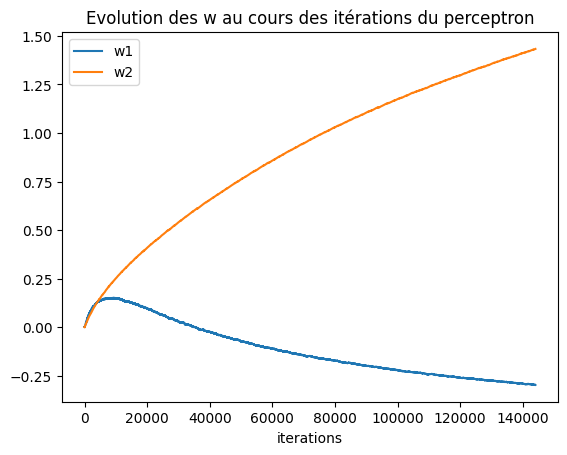

In [ ]:
perceptron1 = cl.ClassifierPerceptronBiais(dim, eps, poids_0)

les_differences = perceptron1.train(Xtrain, Ytrain, 500, 0.001)

# récupération de l'évolution des w au cours de l'apprentissage 
# perceptron initialisé à 0
# si allw est sous forme de liste de couples [w1, w2], on doit la convertir en np.array pour la suite:
allw = np.array(perceptron1.get_allw()) 

# Tracé de l'évolution des w:
plt.figure()
plt.plot(allw[:,0]) # première coordonnée du vecteur poids: w1
plt.plot(allw[:,1]) # deuxième coordonnée du vecteur poids: w2
plt.title('Evolution des w au cours des itérations du perceptron')
plt.xlabel('iterations')
plt.legend(['w1','w2'])

# Sauvegarde de la figure obtenue (décommenter la ligne ci-dessous):
#plt.savefig('out/cvg.png')


In [ ]:
test_accuracy = perceptron1.accuracy(Xtest, Ytest)
print("Accuracy sur le test : ", test_accuracy)

Accuracy sur le test :  0.9986737400530504


In [ ]:
# test sur les données jouet X, Y supposées pré-existantes

index = np.random.permutation(len(X)) # mélange des index
Xm = X[index]
Ym = Y[index]
niter = 10
perf = []

# Paramètres pour le perceptron:
dim = 16
eps = 1e-3    # learning rate
poids_0 = True   # valeur initiale des poids à 0

perceptron4 = cl.ClassifierPerceptronBiais(dim, eps, poids_0)
perf = ev.validation_croisee(perceptron4, (Xm,Ym), niter )
print("Perf ", perf)

print("Analyse performances : ", ev.analyse_perfs(perf[0]))

Perf  ([1.0, 0.996, 1.0, 0.996, 0.988, 0.996, 0.992, 1.0, 0.992, 0.996], 0.9956000000000002, 0.0037735924528226445)
Analyse performances :  (0.9956000000000002, 0.0037735924528226445)


### K moyennes

In [58]:
df_X = pd.DataFrame(data=X, columns = ['Changement climatique',
        'Appauvrissement de la couche d\'ozone', 'Rayonnements ionisants',
        'Formation photochimique d\'ozone', 'Particules fines',
        'Effets toxicologiques sur la santé humaine : substances non-cancérogènes',
        'Effets toxicologiques sur la santé humaine : substances cancérogènes',
        'Acidification terrestre et eaux douces', 'Eutrophisation eaux douces',
        'Eutrophisation marine', 'Eutrophisation terrestre',
        'Écotoxicité pour écosystèmes aquatiques d\'eau douce',
        'Utilisation du sol', 'Épuisement des ressources eau',
        'Épuisement des ressources énergétiques',
        'Épuisement des ressources minéraux'])
df_Y = pd.DataFrame(data=Y, columns = ["Labels"])

In [46]:
C, U = clust.kmoyennes(2, df_X, 0.001, 1000, verbose = True)

iteration 1 Inertie : 376.9641 Difference: 376.9641


KeyboardInterrupt: 

In [159]:
df_X.iloc[U[0]]

,Changement climatique,Appauvrissement de la couche d'ozone,Rayonnements ionisants,Formation photochimique d'ozone,Particules fines,Effets toxicologiques sur la santé humaine : substances non-cancérogènes,Effets toxicologiques sur la santé humaine : substances cancérogènes,Acidification terrestre et eaux douces,Eutrophisation eaux douces,Eutrophisation marine,Eutrophisation terrestre,Écotoxicité pour écosystèmes aquatiques d'eau douce,Utilisation du sol,Épuisement des ressources eau,Épuisement des ressources énergétiques,Épuisement des ressources minéraux
10,0.204855,0.284746,0.105901,0.576505,0.393554,0.043440,0.155522,0.352640,0.010796,0.116787,0.210920,0.124661,0.004243,0.000853,0.246887,0.027530
14,0.250951,0.215762,0.842872,0.072931,0.279645,0.177487,0.235289,0.265600,0.066488,0.086820,0.257626,0.572235,0.138325,0.019241,0.301032,0.039786
15,0.234838,0.004186,0.364651,0.359473,0.179949,0.045494,0.100901,0.188774,0.279352,0.059816,0.057764,0.040294,0.016709,0.073990,0.441695,0.542343
22,0.199093,0.170983,0.613438,0.057531,0.221889,0.139417,0.184748,0.210112,0.052098,0.068631,0.204283,0.448786,0.109465,0.015161,0.225557,0.029702
27,0.356586,0.072832,0.164303,0.088587,0.201032,0.357818,0.195515,0.201408,0.054547,0.190438,0.194205,0.457399,0.225622,0.010725,0.142370,0.024427
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2467,0.228209,0.004022,0.361359,0.322395,0.178431,0.044997,0.099173,0.178308,0.277848,0.053417,0.050880,0.039560,0.016583,0.073990,0.438875,0.540472
2484,0.323935,0.105267,0.335336,0.125547,0.111349,0.192514,0.170904,0.094676,1.000000,0.057002,0.054825,0.474624,0.050849,1.000000,0.312517,0.036218
2487,0.204855,0.284746,0.105901,0.576505,0.393554,0.043440,0.155522,0.352640,0.010796,0.116787,0.210920,0.124661,0.004243,0.000853,0.246887,0.027530
2492,0.556332,0.111318,0.300573,0.138124,0.313337,0.561193,0.305607,0.314560,0.086695,0.297783,0.304332,0.715780,0.351100,0.016751,0.228838,0.039554


In [160]:
df_X.iloc[U[1]]

,Changement climatique,Appauvrissement de la couche d'ozone,Rayonnements ionisants,Formation photochimique d'ozone,Particules fines,Effets toxicologiques sur la santé humaine : substances non-cancérogènes,Effets toxicologiques sur la santé humaine : substances cancérogènes,Acidification terrestre et eaux douces,Eutrophisation eaux douces,Eutrophisation marine,Eutrophisation terrestre,Écotoxicité pour écosystèmes aquatiques d'eau douce,Utilisation du sol,Épuisement des ressources eau,Épuisement des ressources énergétiques,Épuisement des ressources minéraux
0,0.044674,0.024907,0.084487,0.014052,0.036746,0.054059,0.042793,0.034400,0.011561,0.016896,0.033193,0.159398,0.026829,0.006352,0.042611,0.006957
1,0.035610,0.000618,0.010073,0.029941,0.012322,0.008882,0.031607,0.007214,0.033821,0.009950,0.005260,0.019455,0.012965,0.071477,0.024940,0.025826
2,0.054102,0.000532,0.019686,0.044772,0.027469,0.026598,0.046691,0.028166,0.078053,0.056617,0.028391,0.028727,0.057538,0.067837,0.035091,0.047399
3,0.044682,0.000300,0.006979,0.038561,0.019099,0.190075,0.009561,0.023789,0.033219,0.043133,0.022012,0.024412,0.017236,0.164078,0.018455,0.043596
4,0.173430,0.001042,0.082530,0.089637,0.084364,0.068865,0.050462,0.088489,0.109195,0.074442,0.088055,0.043599,0.070352,0.071901,0.104034,0.145789
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2505,0.026713,0.000381,0.013003,0.018632,0.007695,0.006147,0.004769,0.005026,0.011419,0.010179,0.003571,0.013488,0.005176,0.066656,0.025081,0.038670
2506,0.028349,0.013652,0.101174,0.008585,0.016050,0.034924,0.021917,0.013620,0.005315,0.007534,0.012888,0.035949,0.009979,0.004845,0.042939,0.005413
2507,0.099412,0.070533,0.326993,0.030325,0.113113,0.079406,0.118825,0.105991,0.028400,0.036875,0.103251,0.230597,0.054613,0.008298,0.119235,0.014575
2508,0.020990,0.000392,0.004115,0.021135,0.012525,0.017460,0.011211,0.009022,0.010170,0.014612,0.011134,0.009632,0.018894,0.114657,0.009418,0.028445


In [161]:
np.array(df_Y.iloc[U[0]].value_counts())

array([378,  46])

In [163]:
np.array(df_Y.iloc[U[1]].value_counts())

array([1109,  977])

In [59]:
def get_value_counts(U, Labels):
    """
    Cette fonction sert à observer l'homogénéité des clusters trouvés, supposant que les vrais labels sont connus.
    En entrée:
        U : un dictionnaire d'affectation des clusters par indice dans la base et dans le vecteur correspondant de Labels
        Labels : un DataFrame des labels
    En sortie:
        Une liste de tuples, contenant le nombre de valeurs de chaque label, trié par valeur de label croissant
    """
    result = []
    labels_arr = np.unique(Labels.values)
    labels_arr.sort()
    for key in U.keys():
        counts = []
        vcs = Labels.iloc[U[key]].value_counts()
        vcs_labels = vcs.index.tolist()
        for label in labels_arr:
            if label in vcs_labels:
                counts.append(vcs[label])
            else:
                counts.append(0)
        result.append(tuple(counts))
    return result


In [84]:
XieBeni_values = []
Cs = []
Us = []
vcs = []

for k in range (2,10):
    C, U = clust.kmoyennes(k, df_X, 0.1, 100, verbose = False)
    Cs.append(C)
    Us.append(U)
    XieBeni_values.append( clust.XieBeni(df_X, C, U) )
    vcs.append(get_value_counts(U,df_Y))

In [88]:
for i,vc in enumerate(vcs):
    print(f"Nombre de valeurs (-1,+1) dans chaque cluster pour k = {i+2}:\n\t{vc}")

Nombre de valeurs (-1,+1) dans chaque cluster pour k = 2:
	[(7, 241), (1016, 1246)]
Nombre de valeurs (-1,+1) dans chaque cluster pour k = 3:
	[(4, 106), (950, 923), (69, 458)]
Nombre de valeurs (-1,+1) dans chaque cluster pour k = 4:
	[(875, 481), (43, 306), (4, 106), (101, 594)]
Nombre de valeurs (-1,+1) dans chaque cluster pour k = 5:
	[(887, 920), (35, 119), (4, 106), (0, 320), (97, 22)]
Nombre de valeurs (-1,+1) dans chaque cluster pour k = 6:
	[(846, 414), (5, 635), (0, 292), (3, 106), (123, 13), (46, 27)]
Nombre de valeurs (-1,+1) dans chaque cluster pour k = 7:
	[(1, 118), (9, 750), (908, 92), (96, 16), (4, 103), (0, 137), (5, 271)]
Nombre de valeurs (-1,+1) dans chaque cluster pour k = 8:
	[(62, 27), (1, 118), (0, 176), (797, 401), (2, 32), (3, 627), (156, 5), (2, 101)]
Nombre de valeurs (-1,+1) dans chaque cluster pour k = 9:
	[(2, 261), (36, 0), (123, 5), (26, 16), (5, 732), (0, 137), (1, 118), (4, 103), (826, 115)]


Text(0, 0.5, 'Indice de Xie-Beni')

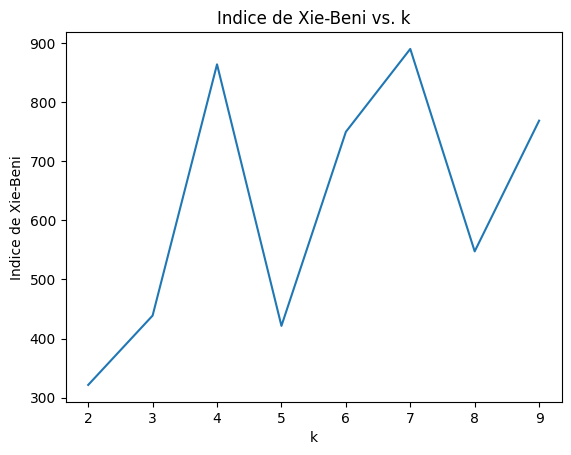

In [86]:
XieBeni_values

plt.figure()
plt.plot(range(2,10), XieBeni_values)
plt.title('Indice de Xie-Beni vs. k')
plt.xlabel('k')
plt.ylabel('Indice de Xie-Beni')

In [139]:
vcs

[[(887, 329), (30, 627), (1, 119), (4, 106), (0, 223), (4, 67), (97, 16)]]

In [153]:
#Dunn index
clust.Dunn(df_X, Cs[0], Us[0])

KeyboardInterrupt: 

### Réduction du nombre d'attributs

On a observé grâce aux arbres de classification numérique que certains attributs sont plus utiles que d'autres pour distinguer les produits animaux ou végétaux.  On essaie maintenant de faire un clustering de kmoyennes sur un sous-ensemble d'attributs dont le gain d'information est grand.

attributs : 
        'Changement climatique',
        'Appauvrissement de la couche d\'ozone', 'Rayonnements ionisants',
        'Formation photochimique d\'ozone', 'Particules fines',
        'Effets toxicologiques sur la santé humaine : substances non-cancérogènes',
        'Effets toxicologiques sur la santé humaine : substances cancérogènes',
        'Acidification terrestre et eaux douces', 'Eutrophisation eaux douces',
        'Eutrophisation marine', 'Eutrophisation terrestre',
        'Écotoxicité pour écosystèmes aquatiques d\'eau douce',
        'Utilisation du sol', 'Épuisement des ressources eau',
        'Épuisement des ressources énergétiques',
        'Épuisement des ressources minéraux'


attributs à retenir : 
        'Changement climatique','Appauvrissement de la couche d\'ozone', 'Rayonnements ionisants','Épuisement des ressources eau'

In [91]:
X_reduced = df_X[['Changement climatique','Appauvrissement de la couche d\'ozone', 'Rayonnements ionisants','Épuisement des ressources eau']]

In [92]:
XieBeni_values = []
Cs = []
Us = []
vcs = []

for k in range (2,10):
    C, U = clust.kmoyennes(k, X_reduced, 0.1, 100, verbose = False)
    Cs.append(C)
    Us.append(U)
    XieBeni_values.append( clust.XieBeni(df_X, C, U) )
    vcs.append(get_value_counts(U,df_Y))

In [ ]:
for i, vc in enumerate(vcs):
    print(f"Nombre de valeurs (-1,+1) dans chaque cluster pour k = {i+2}:\n\t{vc}")

Nombre de valeurs (-1,+1) dans chaque cluster pour k = 2:
	[(7, 241), (1016, 1246)]
Nombre de valeurs (-1,+1) dans chaque cluster pour k = 3:
	[(4, 106), (950, 923), (69, 458)]
Nombre de valeurs (-1,+1) dans chaque cluster pour k = 4:
	[(875, 481), (43, 306), (4, 106), (101, 594)]
Nombre de valeurs (-1,+1) dans chaque cluster pour k = 5:
	[(887, 920), (35, 119), (4, 106), (0, 320), (97, 22)]
Nombre de valeurs (-1,+1) dans chaque cluster pour k = 6:
	[(846, 414), (5, 635), (0, 292), (3, 106), (123, 13), (46, 27)]
Nombre de valeurs (-1,+1) dans chaque cluster pour k = 7:
	[(1, 118), (9, 750), (908, 92), (96, 16), (4, 103), (0, 137), (5, 271)]
Nombre de valeurs (-1,+1) dans chaque cluster pour k = 8:
	[(62, 27), (1, 118), (0, 176), (797, 401), (2, 32), (3, 627), (156, 5), (2, 101)]
Nombre de valeurs (-1,+1) dans chaque cluster pour k = 9:
	[(2, 261), (36, 0), (123, 5), (26, 16), (5, 732), (0, 137), (1, 118), (4, 103), (826, 115)]


Text(0, 0.5, 'Indice de Xie-Beni')

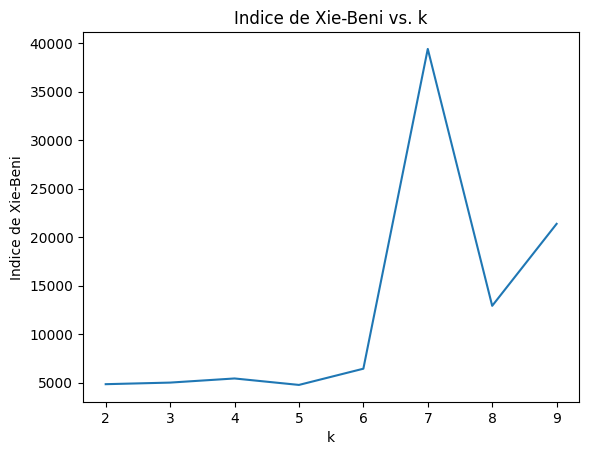

In [93]:

plt.figure()
plt.plot(range(2,10), XieBeni_values)
plt.title('Indice de Xie-Beni vs. k')
plt.xlabel('k')
plt.ylabel('Indice de Xie-Beni')